$\textcolor{red}{Primer\;\;punto:}$

In [122]:
'''Me basé en código encontrado en GitHub: https://github.com/cabre94.'''

'Me basé en código encontrado en GitHub: https://github.com/cabre94.'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-paper')
%config InlineBackend.figure_format = 'retina'
from scipy.integrate import odeint

In [2]:
def g_R(p, a, b, c, h):
    """
    Función de represion para el modelo de Goodwin
    """
    return a / (b + c * np.power(p, h))

def GoodwinModel(z, t, alphas, betas, *args):
    """
    Modelo de Goodwin
    """
    m, e, p = z
    alpha_m, alpha_e, alpha_p = alphas
    beta_m, beta_e, beta_p = betas
    # a, b, c = params

    dm_dt = alpha_m * g_R(p, *args) - beta_m*m
    de_dt = alpha_e * m - beta_e * e
    dp_dt = alpha_p * e - beta_p * p

    return np.array([dm_dt, de_dt, dp_dt])

C:\Users\oscar\AppData\Local\Temp\ipykernel_7596\2893006617.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


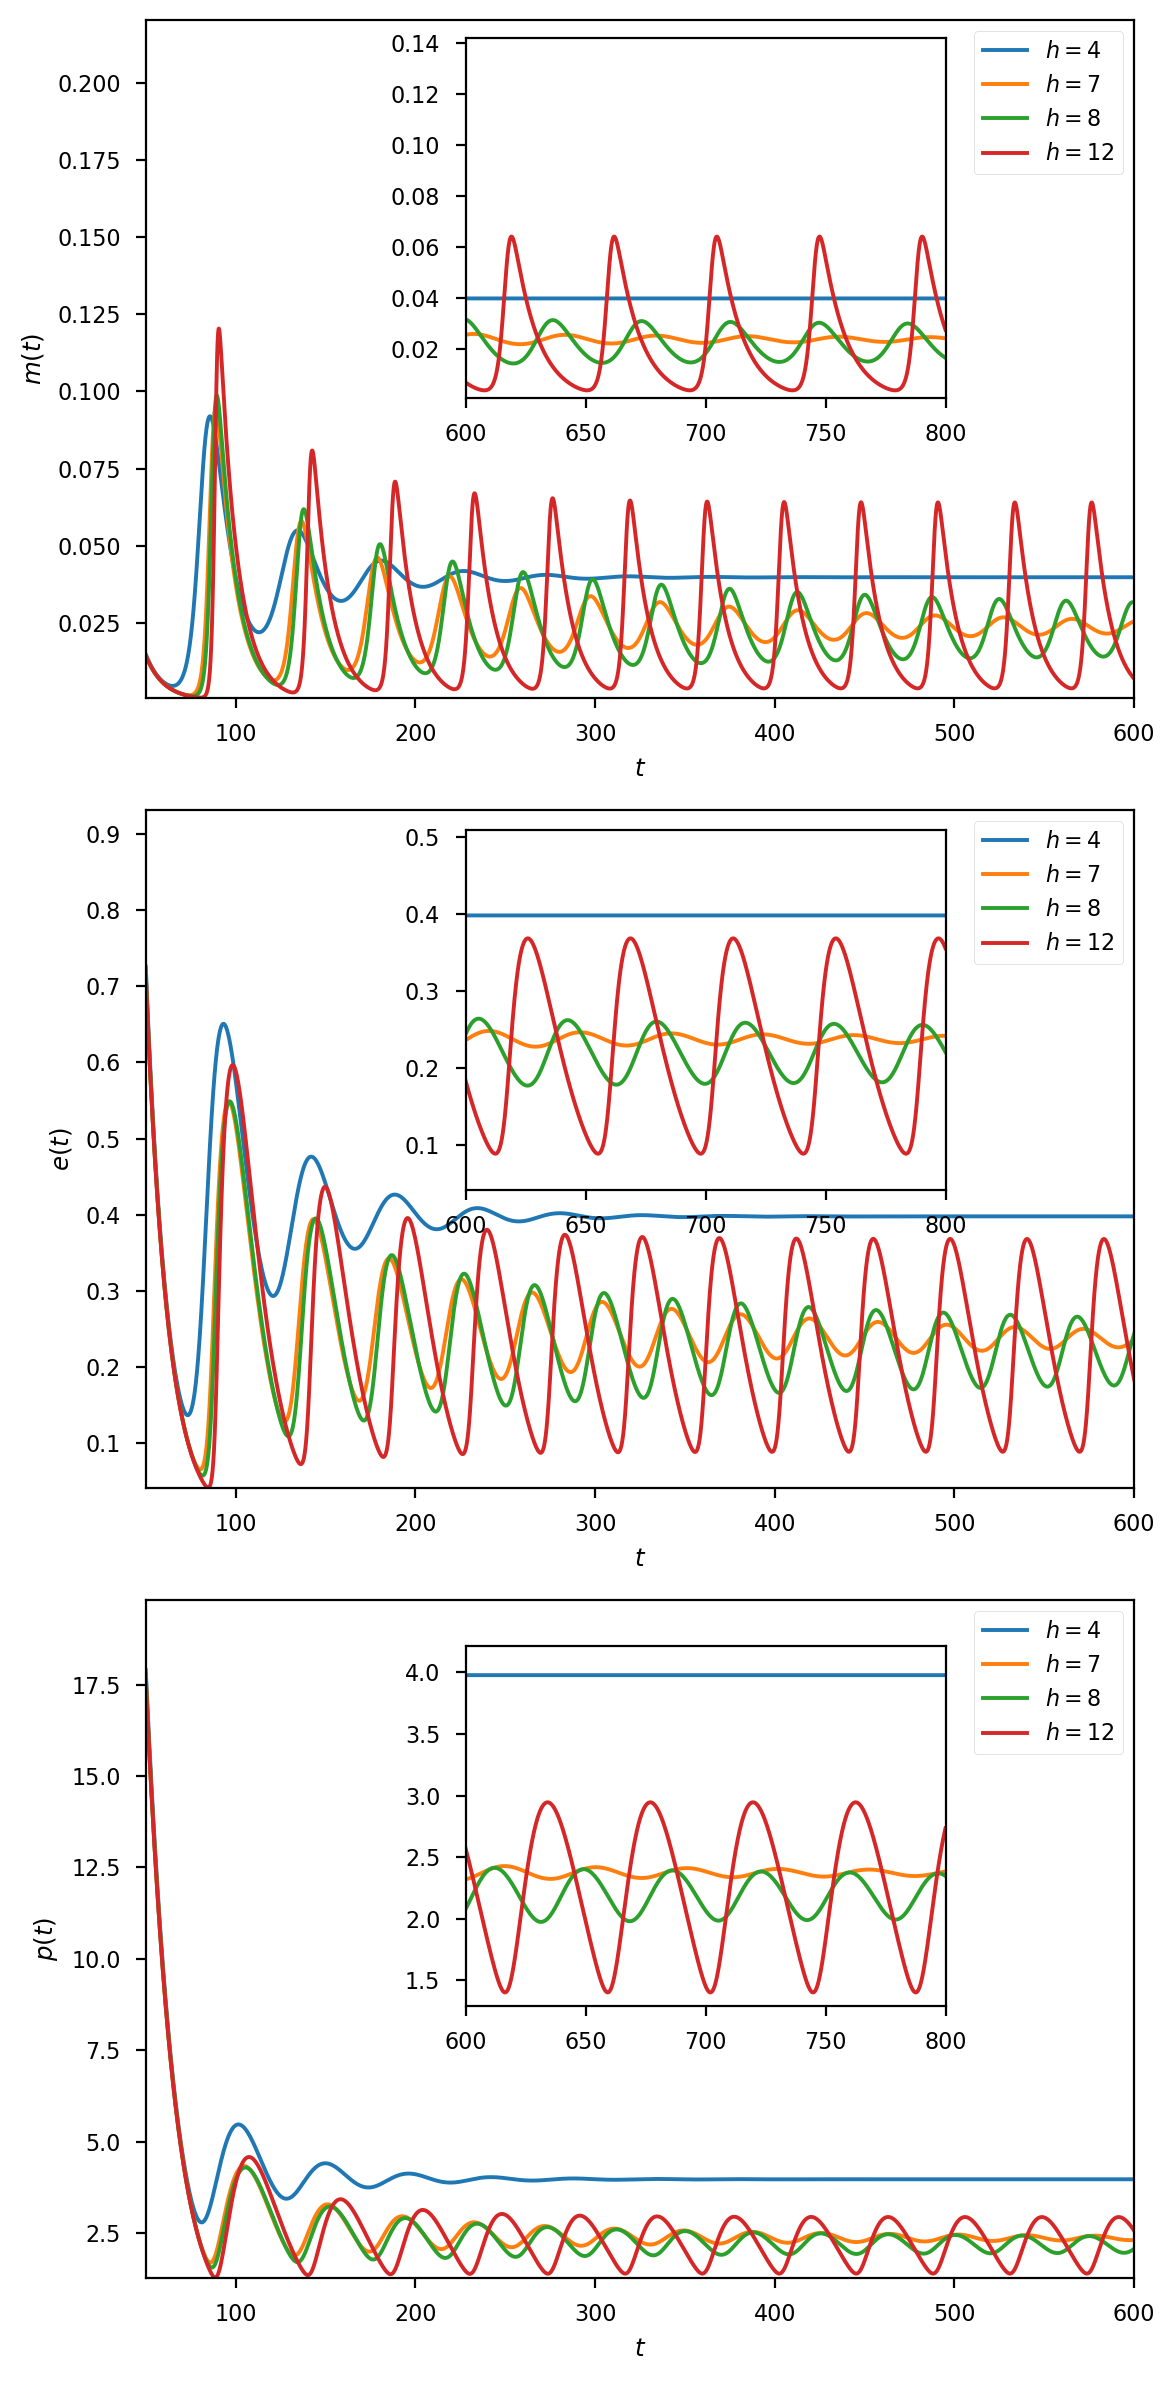

In [207]:
alphas = alpha_m, alpha_e, alpha_p = 1, 1, 1
betas = beta_m, beta_e, beta_p = 0.1, 0.1, 0.1
params = a, b, c = 1, 1, 1
r0 =  [0.5, 0, 0]
t = np.linspace(0,800, 10000)

m_h = []
e_h = []
p_h = []

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6, 12))
# These are in unitless percentages of the figure size. (0,0 is bottom left)
width, height, left = [0.4, 0.15, 0.4]
bottom = [0.83, 0.5, 0.16]
# ax1 = fig.add_axes([left, bottom, width, height])
axs = [[]]*3
h = [4, 7, 8, 12]

for H in h:
    r = odeint(GoodwinModel, r0, t, args=(alphas, betas, a, b, c, H))
    m_h.append(r[:,0])
    e_h.append(r[:,1])
    p_h.append(r[:,2])

concentraciones = [m_h, e_h, p_h]
labl = [r'$m(t)$', r'$e(t)$', r'$p(t)$']

for i in range(3):
    ax[i].plot(t, concentraciones[i][0], label = r"$h={}$".format(h[0]))
    ax[i].plot(t, concentraciones[i][1], label = r"$h={}$".format(h[1]))
    ax[i].plot(t, concentraciones[i][2], label = r"$h={}$".format(h[2]))
    ax[i].plot(t, concentraciones[i][3], label = r"$h={}$".format(h[3]))
    ax[i].legend()
    ax[i].set_xlabel(r'$t$')
    ax[i].set_ylabel(labl[i])
    ax[i].set_xlim([50, 600])
    ax[i].set_ylim([np.array(concentraciones[i][3][600:]).min(), np.array(concentraciones[i][3][600:]).max()+0.1])

    axs[i] = fig.add_axes([left, bottom[i], width, height])
    axs[i].plot(t, concentraciones[i][0])
    axs[i].plot(t, concentraciones[i][1])
    axs[i].plot(t, concentraciones[i][2])
    axs[i].plot(t, concentraciones[i][3])
    axs[i].set_xlim([600, 800])
    axs[i].set_ylim([np.array(concentraciones[i][3][600:]).min(), np.array(concentraciones[i][0][2500:]).max()+0.1])
    
plt.tight_layout()
plt.savefig("practica3_punto1.png", dpi=300)
plt.show()

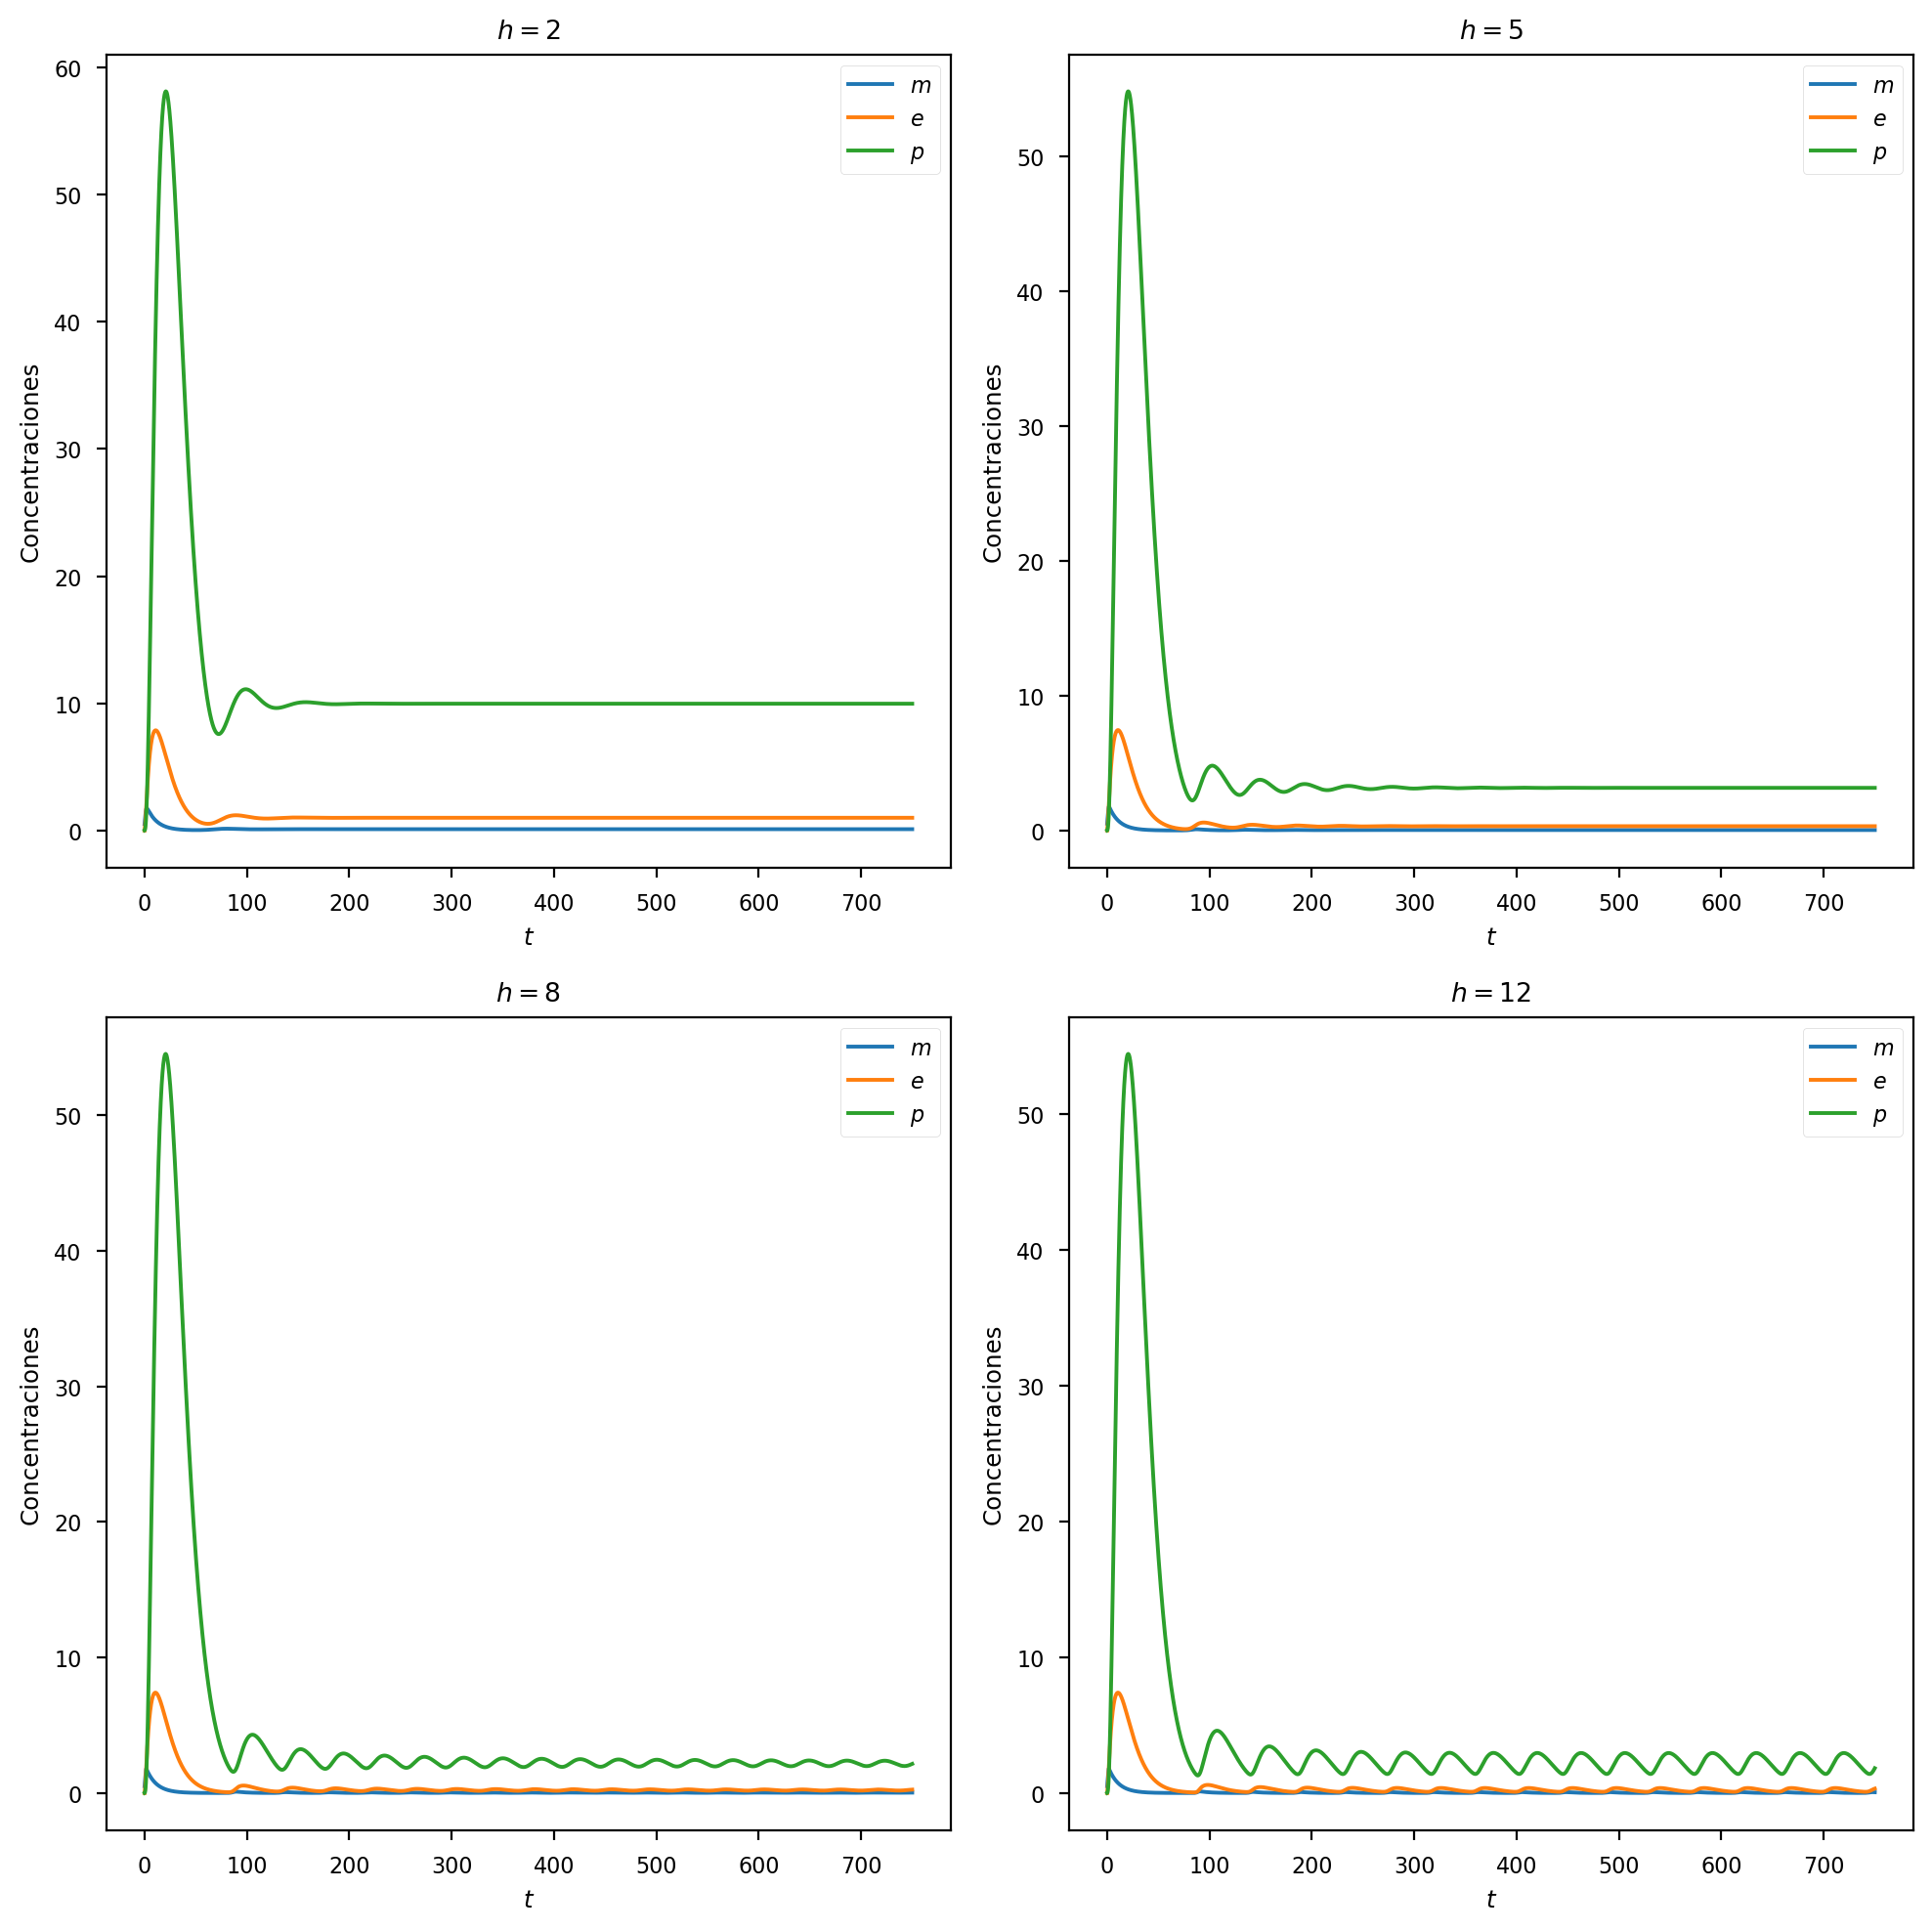

In [162]:
alphas = alpha_m, alpha_e, alpha_p = 1, 1, 1
betas = beta_m, beta_e, beta_p = 0.1, 0.1, 0.1
params = a, b, c = 1, 1, 1
r0 =  [0.5, 0, 0]
t = np.linspace(0,750, 10001)

m_h = []
e_h = []
p_h = []

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# These are in unitless percentages of the figure size. (0,0 is bottom left)
width, height = [0.25, 0.2]
left = [0.2, 0.7, 0.2, 0.7]
bottom = [0.7, 0.7, 0.2, 0.2]
# ax1 = fig.add_axes([left, bottom, width, height])
axs = [[]]*4

for i, h in enumerate([2, 5, 8, 12]):
    r = odeint(GoodwinModel, r0, t, args=(alphas, betas, a, b, c, h))
    row = i // 2
    col = i % 2
    ax[row, col].set_title(r"$h={}$".format(h))
    ax[row, col].plot(t, r[:,0], label = r'$m$')
    ax[row, col].plot(t, r[:,1], label = r'$e$')
    ax[row, col].plot(t, r[:,2], label = r'$p$')
    ax[row, col].set_xlabel(r'$t$')
    ax[row, col].set_ylabel('Concentraciones')
    ax[row, col].legend()
    # axs[i] = fig.add_axes([left[i], bottom[i], width, height])

    # axs[i].plot(t, r[:,0], label = r'$m$')
    # axs[i].plot(t, r[:,1], label = r'$e$')
    # axs[i].plot(t, r[:,2], label = r'$p$')
    # axs[i].set_xlim([400, 500])

plt.tight_layout()
plt.show()

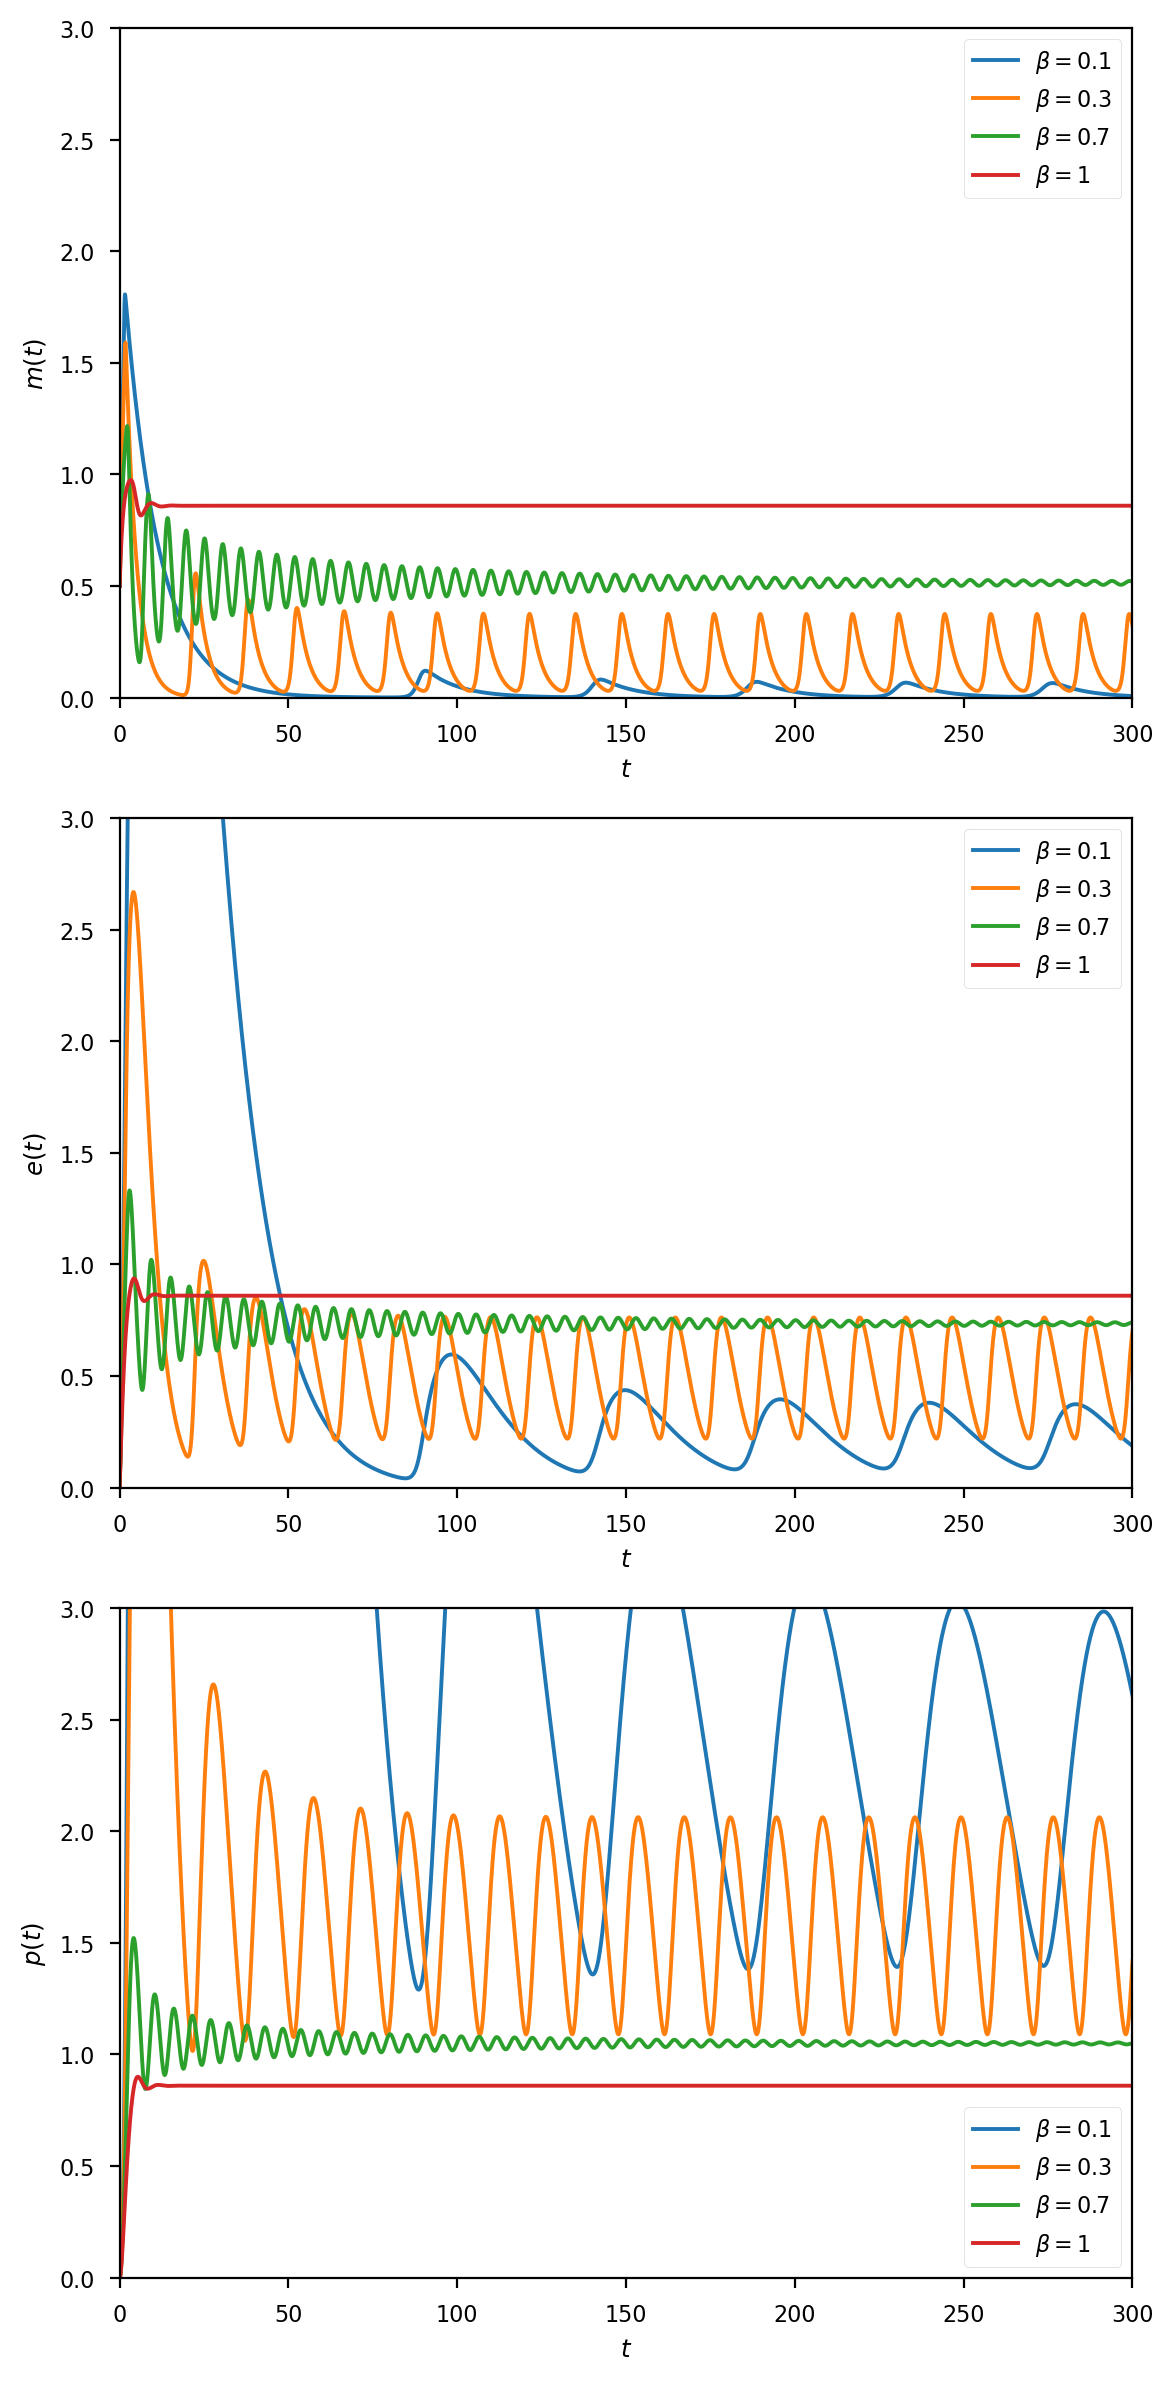

In [195]:
alphas = alpha_m, alpha_e, alpha_p = 1, 1, 1
params = a, b, c = 1, 1, 1
r0 =  [0.5, 0, 0]
t = np.linspace(0,750, 10000)

m_h = []
e_h = []
p_h = []

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6, 12))
# These are in unitless percentages of the figure size. (0,0 is bottom left)
width, height, left = [0.4, 0.15, 0.4]
bottom = [0.8, 0.45, 0.15]
# ax1 = fig.add_axes([left, bottom, width, height])
axs = [[]]*3
h = [3, 5, 8, 12]
betas = [(0.1, 0.1, 0.1), (0.3, 0.3, 0.3), (0.7, 0.7, 0.7), (1, 1, 1)]

for Beta in betas:
    r = odeint(GoodwinModel, r0, t, args=(alphas, Beta, a, b, c, h[3]))
    m_h.append(r[:,0])
    e_h.append(r[:,1])
    p_h.append(r[:,2])

concentraciones = [m_h, e_h, p_h]
labl = [r'$m(t)$', r'$e(t)$', r'$p(t)$']

for i in range(3):
    ax[i].plot(t, concentraciones[i][0], label = r"$\beta={}$".format(betas[0][0]))
    ax[i].plot(t, concentraciones[i][1], label = r"$\beta={}$".format(betas[1][0]))
    ax[i].plot(t, concentraciones[i][2], label = r"$\beta={}$".format(betas[2][0]))
    ax[i].plot(t, concentraciones[i][3], label = r"$\beta={}$".format(betas[3][0]))
    ax[i].legend()
    ax[i].set_xlabel(r'$t$')
    ax[i].set_ylabel(labl[i])
    ax[i].set_xlim([0, 300])
    ax[i].set_ylim([0, 3])

    # axs[i] = fig.add_axes([left, bottom[i], width, height])
    # axs[i].plot(t, concentraciones[i][0])
    # axs[i].plot(t, concentraciones[i][1])
    # axs[i].plot(t, concentraciones[i][2])
    # axs[i].plot(t, concentraciones[i][3])
    # axs[i].set_xlim([500, 700])
    # axs[i].set_ylim([0.08, 1])
    
plt.tight_layout()
plt.savefig("practica3_punto12.png", dpi=300)
plt.show()

$\textcolor{red}{Segundo\;\;punto:}$

In [20]:
def g_R(p, a, b, c, h):
    """
    Función de represion para el modelo de Goodwin
    """
    return a / (b + c * np.power(p, h))

def ToggleSwitch(p1, p2, gamma, beta_p, *args):
    """
    Modelo de toggle switch simplificado, beta_m >> beta_p.
    gamma = (alpha_p * alpha_m) / beta_m.
    """
    
    dp1_dt = gamma * g_R(p2, *args) - beta_p * p1
    dp2_dt = gamma * g_R(p1, *args) - beta_p * p2

    return np.array([dp1_dt, dp2_dt])

def nullclinesSimplifiedModel(p, gamma, beta_p, *args):
    return gamma / beta_p * g_R(p, *args)

In [102]:
np.arange(10, 26, 5)

array([10, 15, 20, 25])

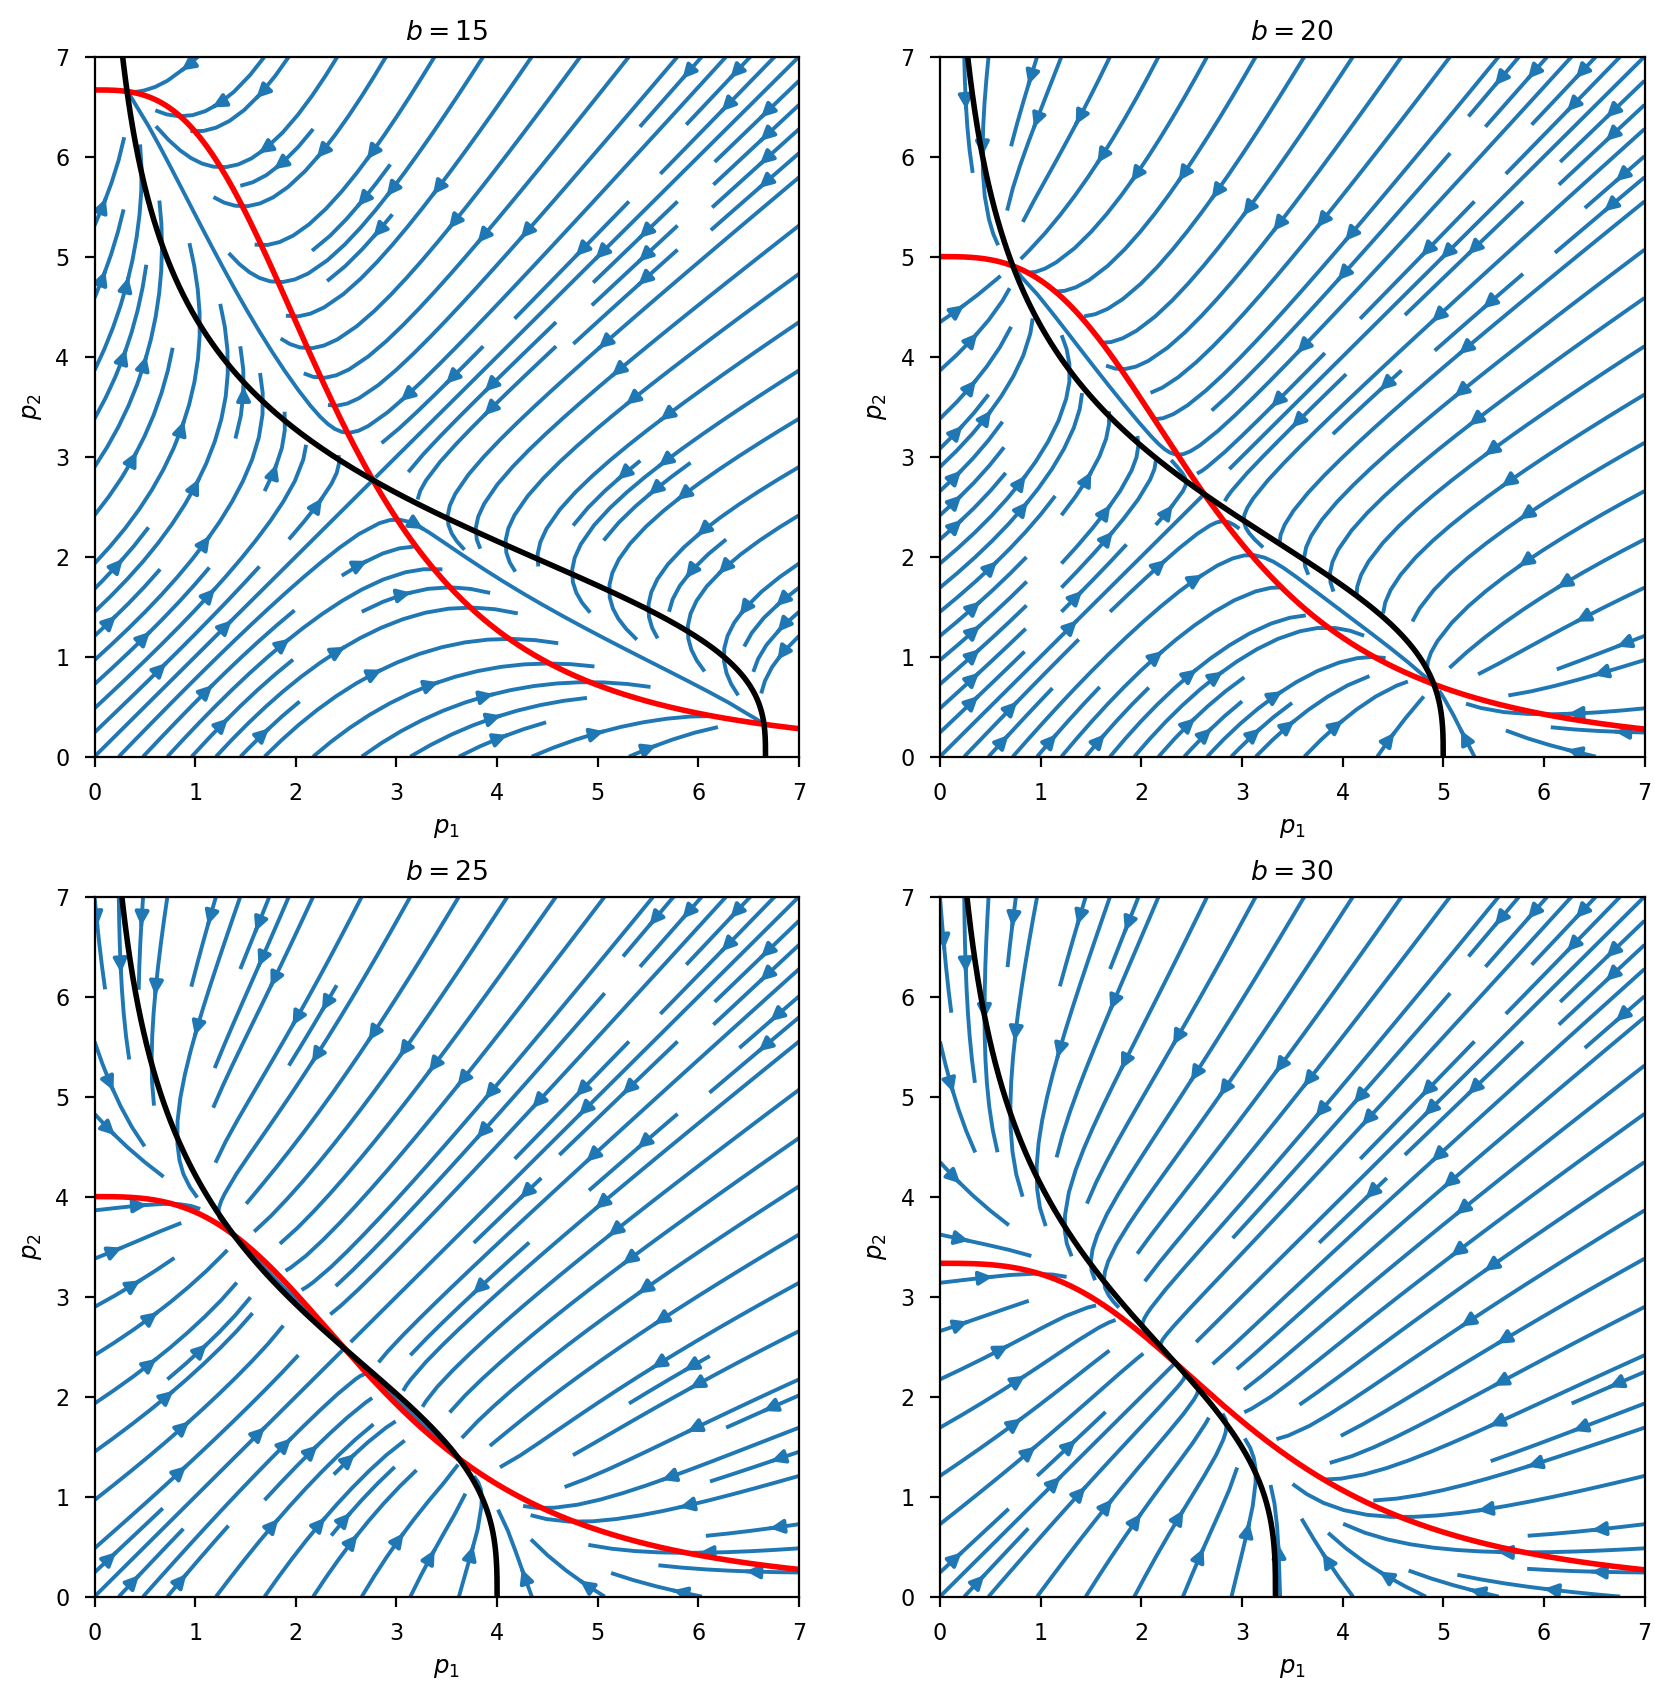

In [118]:
r = 7

# Define a grid of points
P2, P1 = np.mgrid[0:r:500j, 0:r:500j]

gamma, beta_p = 1, 0.001
a, c = 0.1, 1
h = 3

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, b in enumerate(range(15, 31, 5)):
    row = i // 2
    col = i % 2

    # Calculate the velocities at each point
    U, V = ToggleSwitch(P1, P2, gamma, beta_p, a, b, c, h)

    p = np.linspace(0, r, 500)
    p1 = nullclinesSimplifiedModel(p, gamma, beta_p, a, b, c, h)

    ax[row, col].set_xlabel(r'$p_1$')
    ax[row, col].set_ylabel(r'$p_2$')

    ax[row, col].set_title(r"$b={}$".format(b))
    # Create the stream plot
    ax[row, col].streamplot(P1, P2, U, V, density=[1, 1])

    ax[row, col].plot(p, p1, linewidth=2, color='r')
    ax[row, col].plot(p1, p, linewidth=2, color='k')

    ax[row, col].set_xlim(0,r)
    ax[row, col].set_ylim(0,r)

plt.savefig("practica3_punto2.png", dpi=300)
plt.show()

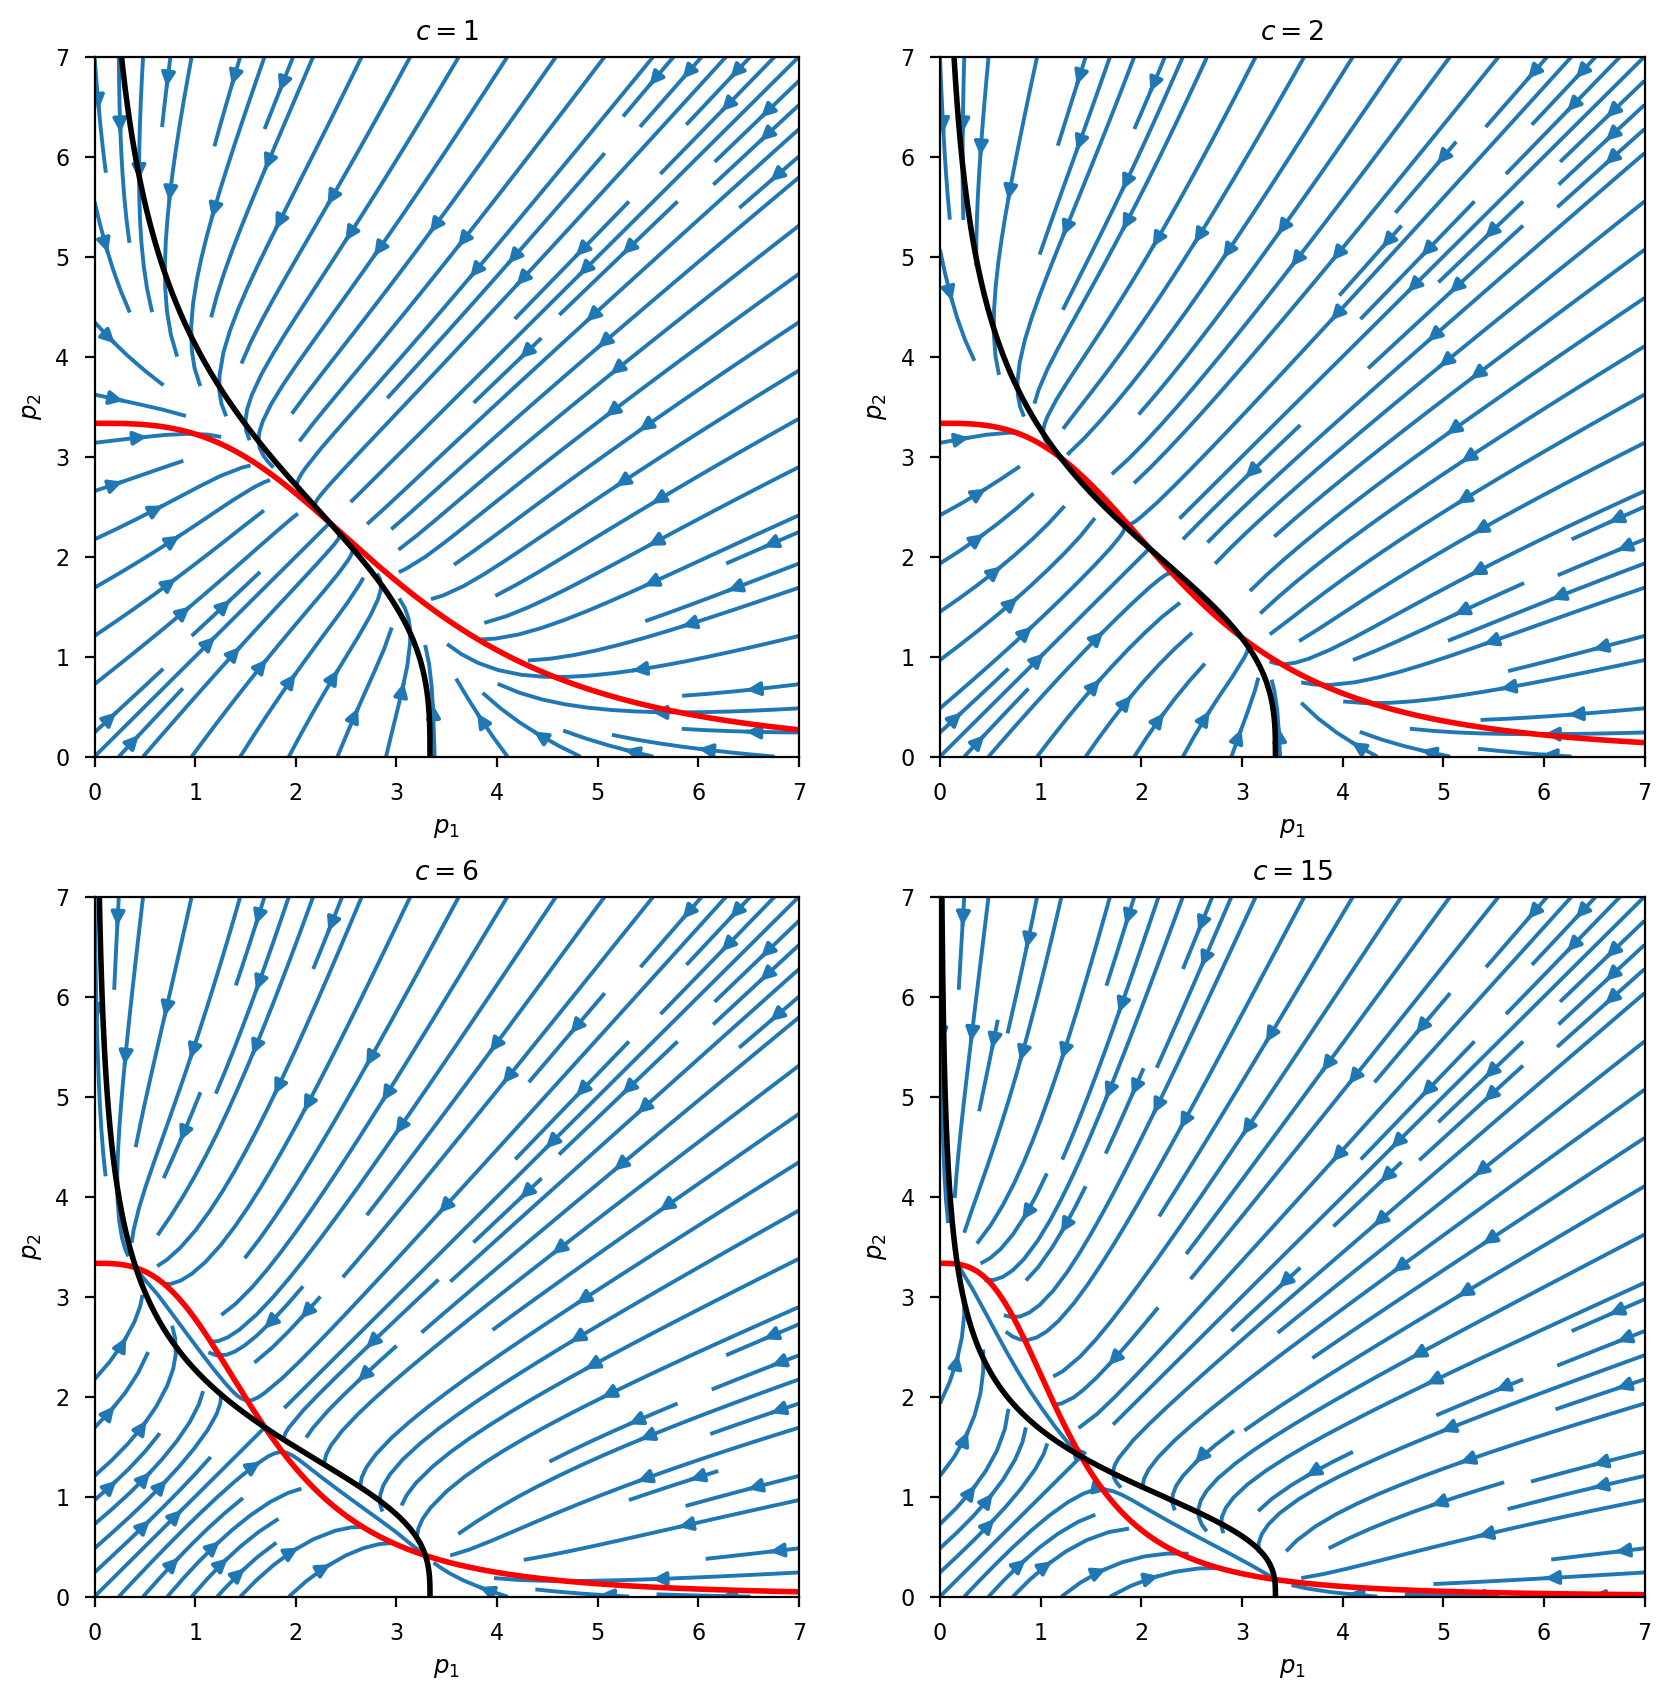

In [120]:
r = 7

# Define a grid of points
P2, P1 = np.mgrid[0:r:500j, 0:r:500j]

gamma, beta_p = 1, 0.001
a, b = 0.1, 30
h = 3

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, c in enumerate((1,2,6,15)):
    row = i // 2
    col = i % 2

    # Calculate the velocities at each point
    U, V = ToggleSwitch(P1, P2, gamma, beta_p, a, b, c, h)

    p = np.linspace(0, r, 500)
    p1 = nullclinesSimplifiedModel(p, gamma, beta_p, a, b, c, h)

    ax[row, col].set_xlabel(r'$p_1$')
    ax[row, col].set_ylabel(r'$p_2$')

    ax[row, col].set_title(r"$c={}$".format(c))
    # Create the stream plot
    ax[row, col].streamplot(P1, P2, U, V, density=[1, 1])

    ax[row, col].plot(p, p1, linewidth=2, color='r')
    ax[row, col].plot(p1, p, linewidth=2, color='k')

    ax[row, col].set_xlim(0,r)
    ax[row, col].set_ylim(0,r)

plt.savefig("practica3_punto21.png", dpi=300)
plt.show()